 코랩에서 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


 구글드라이브 연동

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

In [3]:
import warnings
warnings.filterwarnings('ignore')           # 성가신 warning은 off 해준다. 

---

In [4]:
import numpy as np
import pandas as pd

import requests as req
from bs4 import BeautifulSoup as bs

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 영화랭킹 페이지에서 영화제목, 평점 수집

In [ ]:
url_main = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20220711'

res = req.get(url_main)
soup = bs(res.text, 'html.parser')
print(soup.prettify())

In [10]:
# 영화제목
soup.select('td.title a')[2].text.strip()

'씽2게더'

In [12]:
# 영화평점
soup.select('td.point')[0].text.strip()

'9.79'

In [13]:
names = soup.select('td.title a')
rate = soup.select('td.point')
names[0].text, rate[0].text

('탑건: 매버릭', '9.79')

In [16]:
# 코드 통합
# 방법1
# 순위, 영화제목, 평점 수집
rank_list = []
name_list = []
rating_list = []

names = soup.select('td.title a')
rate = soup.select('td.point')

for index, (n, r) in enumerate(zip(names, rate)):
  # print(index+1, n.text, r.text)
  rank_list.append(index+1)
  name_list.append(n.text)
  rating_list.append(r.text)

In [19]:
# 순위, 영화제목, 평점을 DataFrame으로 표현
dic = {'rank':rank_list, 'title':name_list, 'rating':rating_list}
df = pd.DataFrame(dic)
df.set_index('rank', inplace=True)
df.head()

title rating
rank                   
1        탑건: 매버릭   9.79
2          범죄도시2   9.45
3           씽2게더   9.40
4         로마의 휴일   9.26
5     극장판 주술회전 0   9.24

In [20]:
# naver_movie_info.csv로 저장
df.to_csv(drive_path + 'naver.movie_info.csv', encoding='utf-8')

In [21]:
# naver_movie_info.csv로 읽어오기
df = pd.read_csv(drive_path + 'naver.movie_info.csv')
df.head()

rank       title  rating
0     1     탑건: 매버릭    9.79
1     2       범죄도시2    9.45
2     3        씽2게더    9.40
3     4      로마의 휴일    9.26
4     5  극장판 주술회전 0    9.24

# Pandas를 활용한 날짜 생성

In [24]:
# 시작 날짜, 끝나는 날짜
date = pd.date_range('2022-01-01', '2022-07-13', freq='d')
date

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11',
               '2022-07-12', '2022-07-13'],
              dtype='datetime64[ns]', length=194, freq='D')

In [ ]:
# URL에 맞게 날짜 형식변환 : strftime("%Y%m%d)
day_list = [day.strftime('%Y%m%d') for day in date]
day_list

# 날짜별 영화 평점 수집

In [ ]:
# tqdm : 진행을 출력하는 라이브러리
#!pip install tqdm
from tqdm import tqdm_notebook

In [32]:
movie_date = []
movie_name = []
movie_rate = []

url_main = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='

for day in tqdm_notebook(day_list):
  url_sub = url_main + day
  res = req.get(url_sub)
  soup = bs(res.text, 'html.parser')

  names = soup.select('td.title a')
  rate = soup.select('td.point')

  for n, r in zip(names, rate):
    movie_date.append(day)
    movie_name.append(n.text)
    movie_rate.append(r.text)

  0%|          | 0/194 [00:00<?, ?it/s]

In [33]:
movie_dic = {'날짜':movie_date, 
             '영화명':movie_name, 
             '평점':movie_rate}
movie_df = pd.DataFrame(movie_dic)
movie_df.head(10)

날짜            영화명    평점
0  20220101             코다  9.24
1  20220101  스파이더맨: 노 웨이 홈  8.97
2  20220101        러브 액츄얼리  8.93
3  20220101           아멜리에  8.81
4  20220101       고양이를 부탁해  8.81
5  20220101          공각기동대  8.73
6  20220101          돈 룩 업  8.68
7  20220101            태일이  8.49
8  20220101    엔칸토: 마법의 세계  8.31
9  20220101      연애 빠진 로맨스  8.30

In [48]:
movie_df.to_csv(drive_path + 'naver_movie_info.csv',encoding='utf-8')

In [49]:
df = pd.read_csv(drive_path + 'naver_movie_info.csv',
                        index_col=0,
                        parse_dates=['날짜'],
                        encoding='utf-8')
df.shape

(6306, 3)

In [50]:
df.head()

날짜            영화명    평점
0 2022-01-01             코다  9.24
1 2022-01-01  스파이더맨: 노 웨이 홈  8.97
2 2022-01-01        러브 액츄얼리  8.93
3 2022-01-01           아멜리에  8.81
4 2022-01-01       고양이를 부탁해  8.81

# 영화 평점 변화 시각화를 위한 시각화 정리

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

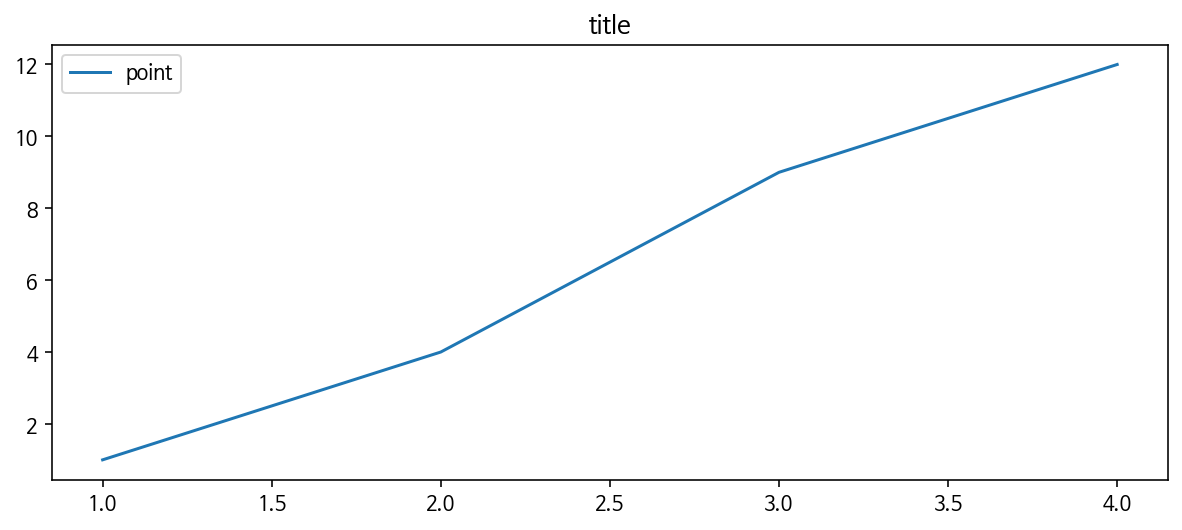

In [36]:
# 시각화 연습
x = [1,2,3,4]
y = [1,4,9,12]

plt.figure(figsize=(10,4))  # 그래프 객체 생성
plt.title('title')          # 그래프 제목
plt.plot(x,y,label='point') # x축, y축 데이터표시
plt.legend()                # 범례 표시

# 영화 평점 변화 시각화하기

## 평균 평점이 높은 영화만 보여주기

In [51]:
name = '스파이더맨: 노 웨이 홈'
df[df['영화명'] == name ]['평점'].mean()

8.864552845528452

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6306 entries, 0 to 6305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      6306 non-null   datetime64[ns]
 1   영화명     6306 non-null   object        
 2   평점      6306 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 197.1+ KB


In [76]:
# 평점 평균이 높은 것만
titles = df['영화명'].unique()

title_ranking = []
for name in titles:
  mean = df[ df['영화명'] == name ]['평점'].mean()
  title_ranking.append([name, mean])

### 평균 평점이 높은 영화 추출하기

In [ ]:
title_ranking


In [78]:
title_ranking_df = pd.DataFrame(title_ranking, columns=['영화명', '평점평균'])
title_ranking_df.head()

영화명      평점평균
0             코다  9.164852
1  스파이더맨: 노 웨이 홈  8.864553
2        러브 액츄얼리  8.930000
3           아멜리에  8.810000
4       고양이를 부탁해  8.810000

In [79]:
title_ranking_df.sort_values(by='평점평균', ascending=False, inplace=True)

In [80]:
# 인덱스 재설정 후 원래 인덱스 삭제
title_ranking_df.reset_index(drop=True, inplace=True)

In [81]:
# 가장 높은 10개의 영화명 추출
title_ranking_10 = title_ranking_df.iloc[:10, :]['영화명'].values
title_ranking_10

array(['장민호 드라마 최종회', '탑건: 매버릭', '원더', '범죄도시2', '주전장', '가나의 혼인잔치: 언약',
       '씽2게더', '시네마 천국', '언터처블: 1%의 우정', '패왕별희 디 오리지널'], dtype=object)

## 그래프 그리기

In [ ]:
# 윈도우 한글 설정
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

(array([738180., 738182., 738184., 738186., 738187., 738189., 738191.,
        738193.]), <a list of 8 Text major ticklabel objects>)

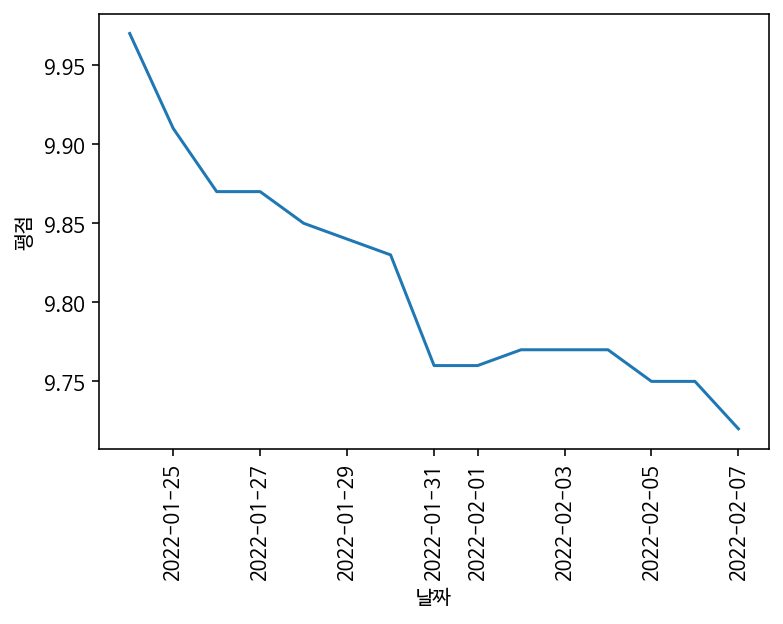

In [82]:
# 1개 영화 그려보기
df_tmp = df[ df['영화명'] == title_ranking_10[0] ]
sns.lineplot('날짜', '평점', data=df_tmp)
plt.xticks(rotation=90)

In [83]:
# seaborn으로 그리기 위해 특정 영화만 데이터프레임으로 합치기
concat_df = pd.DataFrame()
for name in title_ranking_10:
  df_tmp = df[ df['영화명'] == name ]
  concat_df = pd.concat( [concat_df, df_tmp], axis=0 )

In [84]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 424 to 3373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      326 non-null    datetime64[ns]
 1   영화명     326 non-null    object        
 2   평점      326 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.2+ KB


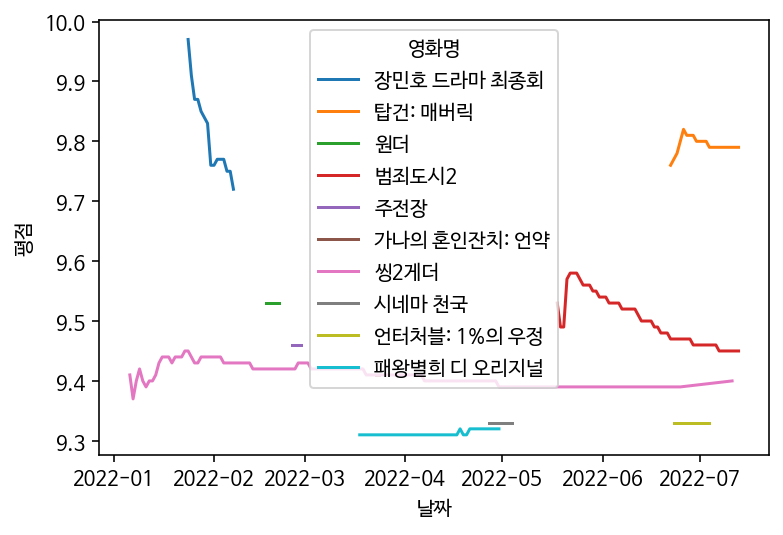

In [85]:

sns.lineplot('날짜', '평점', data=concat_df, hue='영화명')

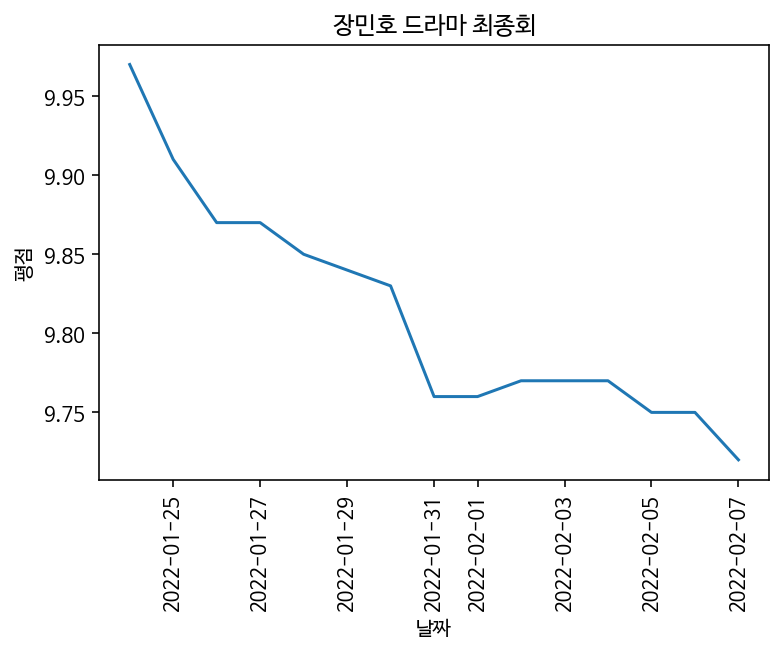

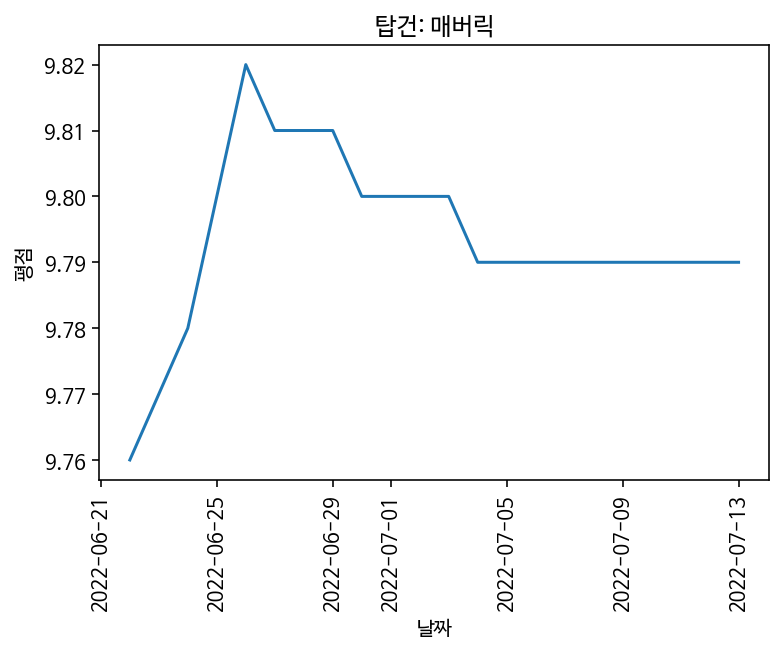

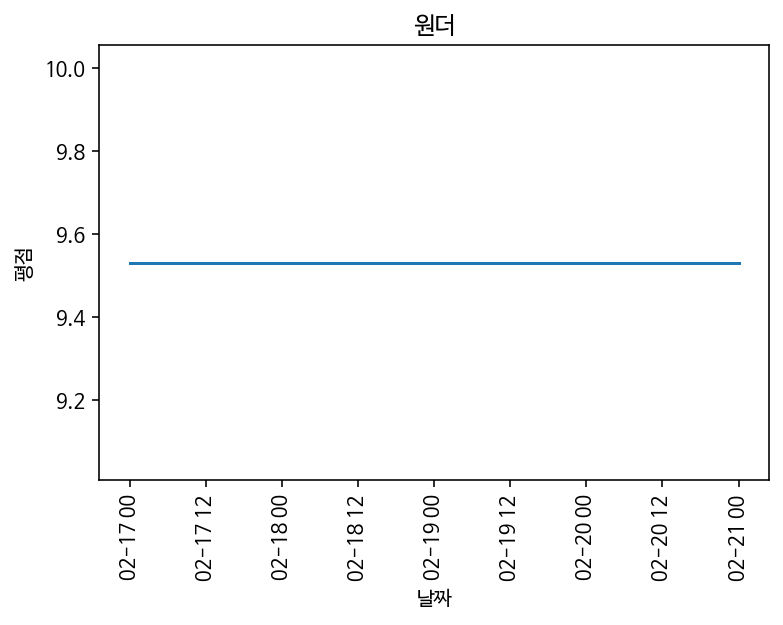

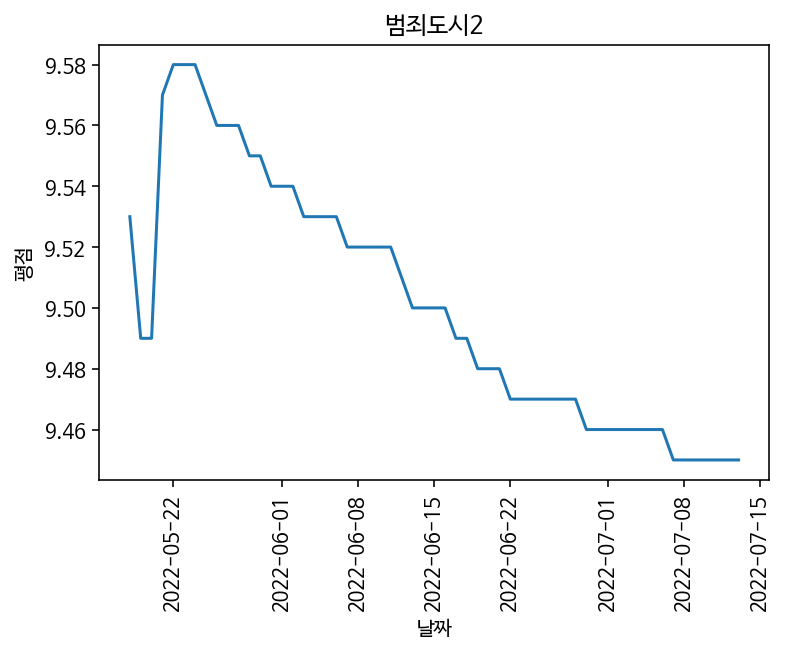

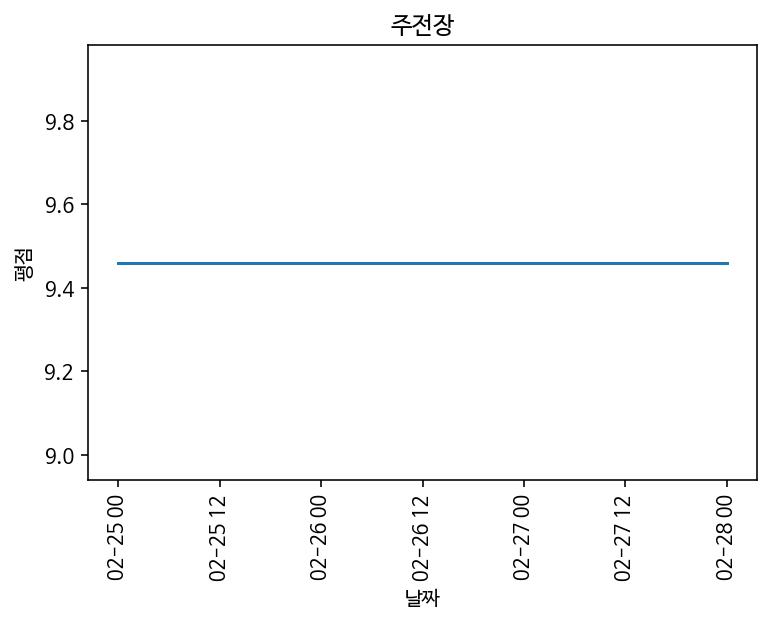

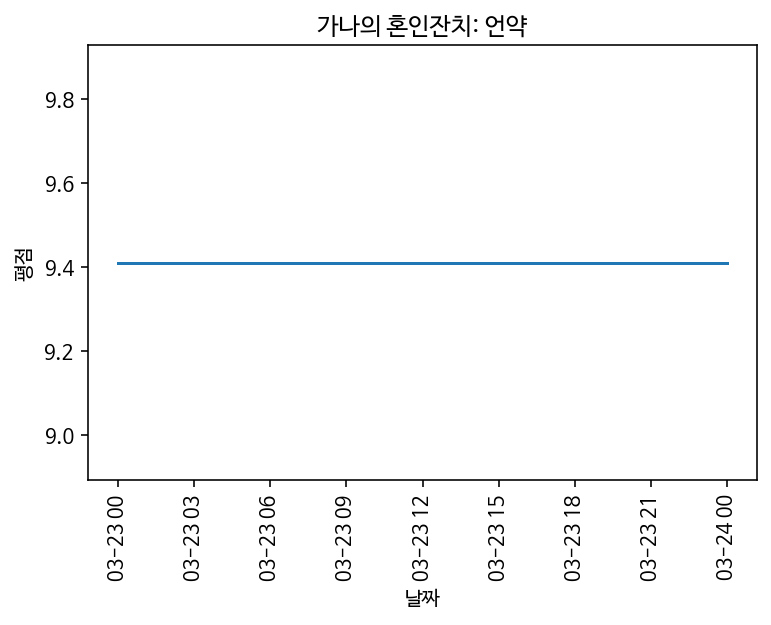

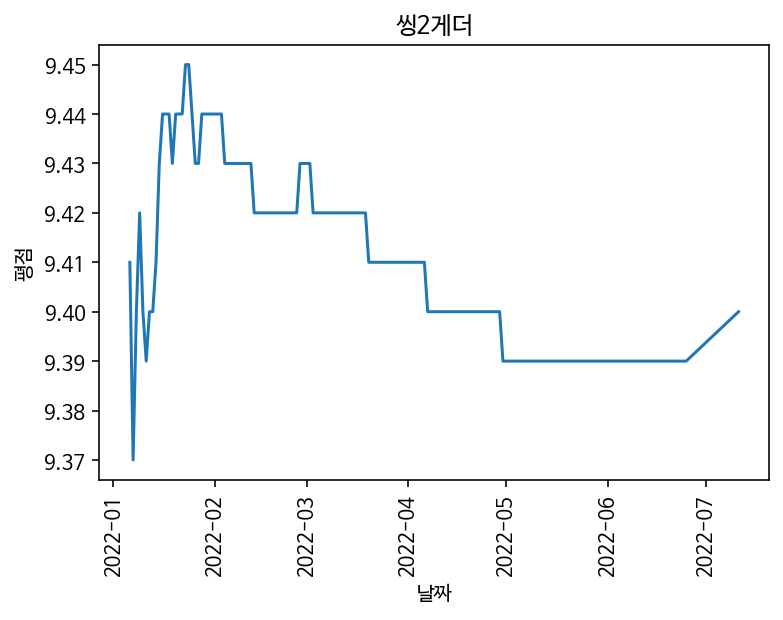

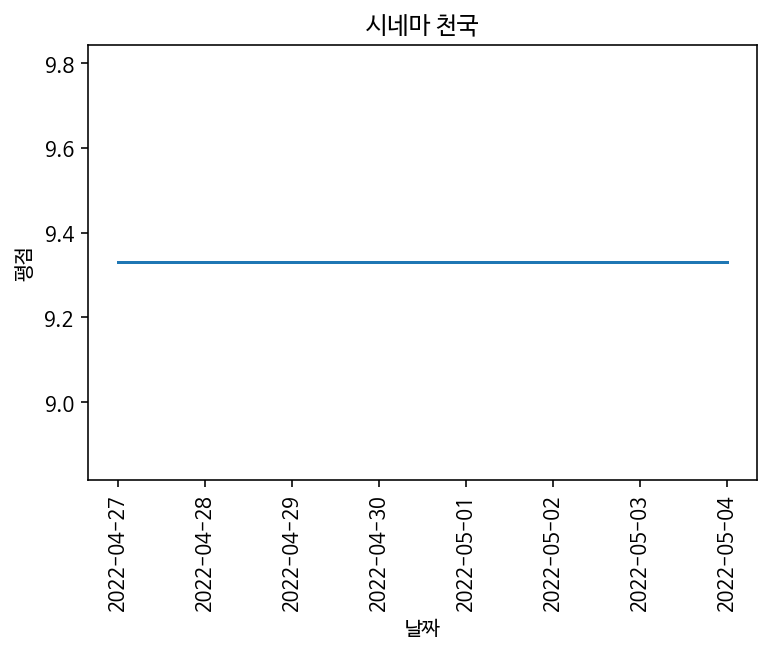

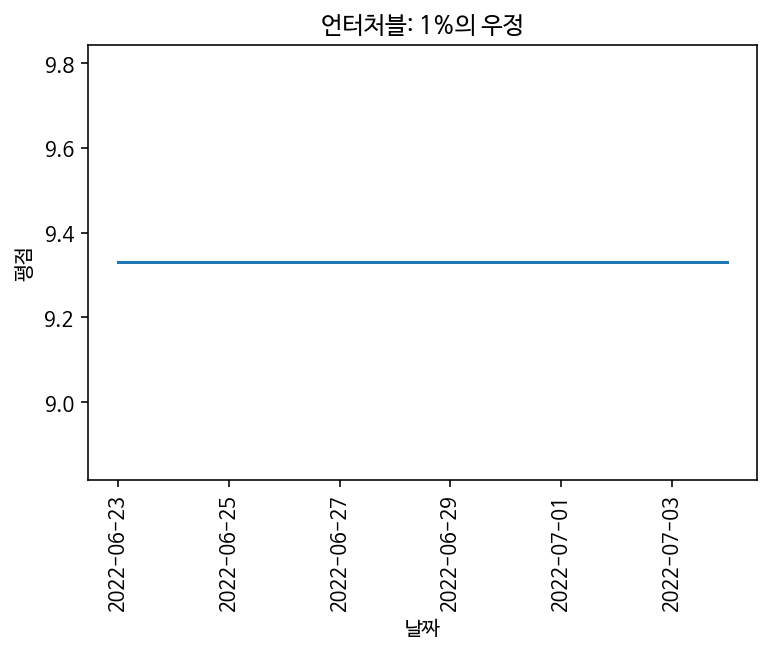

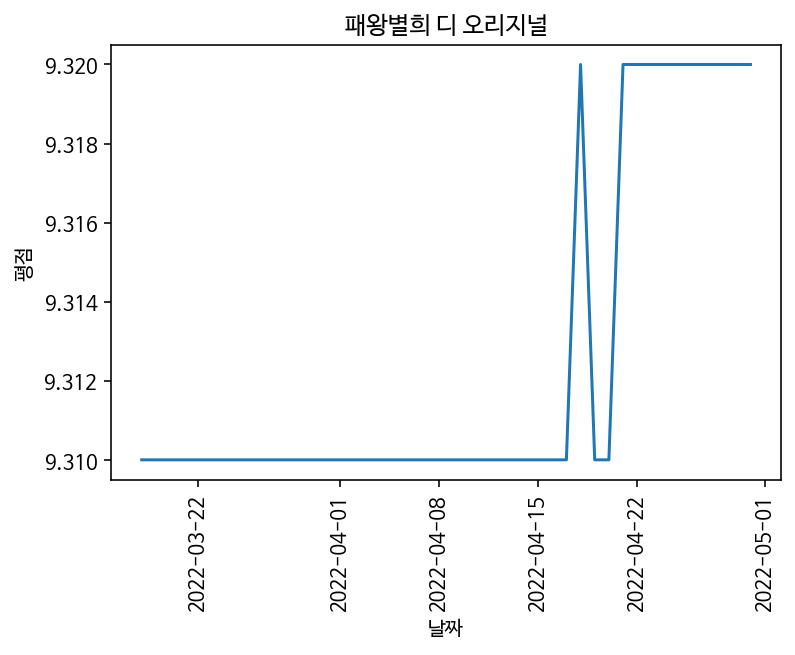

In [86]:
# 영화별로 그래프 그리기
for name in title_ranking_10:
  plt.figure()
  plt.title(name)
  plt.xticks(rotation=90)
  df_tmp = df[df['영화명'] == name ]
  sns.lineplot('날짜', '평점', data=df_tmp)

##2019년 네이버 영화 평점 시각화

In [87]:
df_2019 = pd.read_csv(drive_path + 'naver_movie_info_2019.csv',
                        index_col=0,
                        parse_dates=['날짜'],
                        encoding='utf-8')
df_2019.shape

(16011, 3)

In [88]:
df_2019.head()

날짜                    영화명    평점
0 2019-01-01               보헤미안 랩소디  9.49
1 2019-01-01                  헌터 킬러  9.43
2 2019-01-01             폴란드로 간 아이들  9.42
3 2019-01-01                  트루먼 쇼  9.32
4 2019-01-01  점박이 한반도의 공룡2 : 새로운 낙원  9.24

In [89]:
titles = df_2019['영화명'].unique()

title_ranking = []
for name in titles:
  mean = df_2019[ df_2019['영화명'] == name ]['평점'].mean()
  title_ranking.append([name, mean])

In [ ]:
title_ranking

In [91]:
title_ranking_df = pd.DataFrame(title_ranking, columns=['영화명', '평점평균'])
title_ranking_df.head()

영화명      평점평균
0               보헤미안 랩소디  9.442478
1                  헌터 킬러  9.394412
2             폴란드로 간 아이들  9.371769
3                  트루먼 쇼  9.320000
4  점박이 한반도의 공룡2 : 새로운 낙원  9.171905

In [92]:
title_ranking_df.sort_values(by='평점평균', ascending=False, inplace=True)

In [93]:
# 인덱스 재설정 후 원래 인덱스 삭제
title_ranking_df.reset_index(drop=True, inplace=True)

In [94]:
# 가장 높은 10개의 영화명 추출
title_ranking_10 = title_ranking_df.iloc[:10, :]['영화명'].values
title_ranking_10

array(['그린 북', '가버나움', '포드 V 페라리', '베일리 어게인', '사랑의 선물', '주전장', '원더',
       '안녕 베일리', '보헤미안 랩소디', '당갈'], dtype=object)

In [96]:
concat_df = pd.DataFrame()
for name in title_ranking_10:
  df_tmp = df_2019[ df_2019['영화명'] == name ]
  concat_df = pd.concat( [concat_df, df_tmp], axis=0 )

In [97]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 359 to 9780
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      743 non-null    datetime64[ns]
 1   영화명     743 non-null    object        
 2   평점      743 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.2+ KB


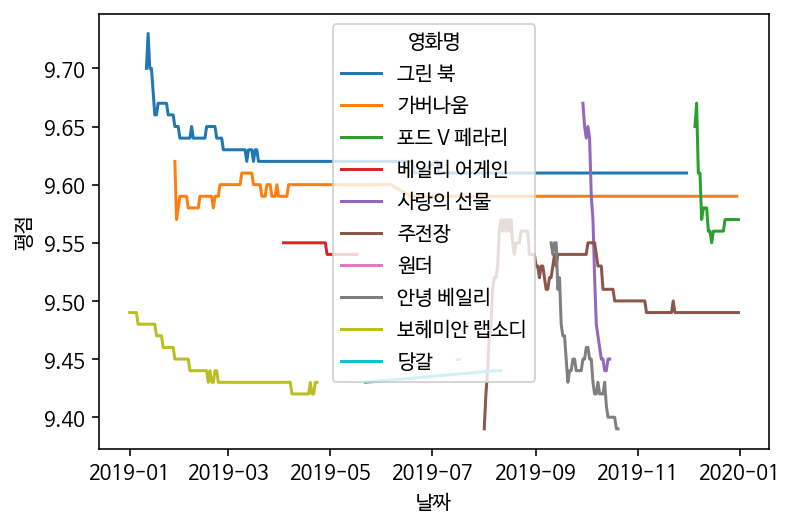

In [98]:
sns.lineplot('날짜', '평점', data=concat_df, hue='영화명')

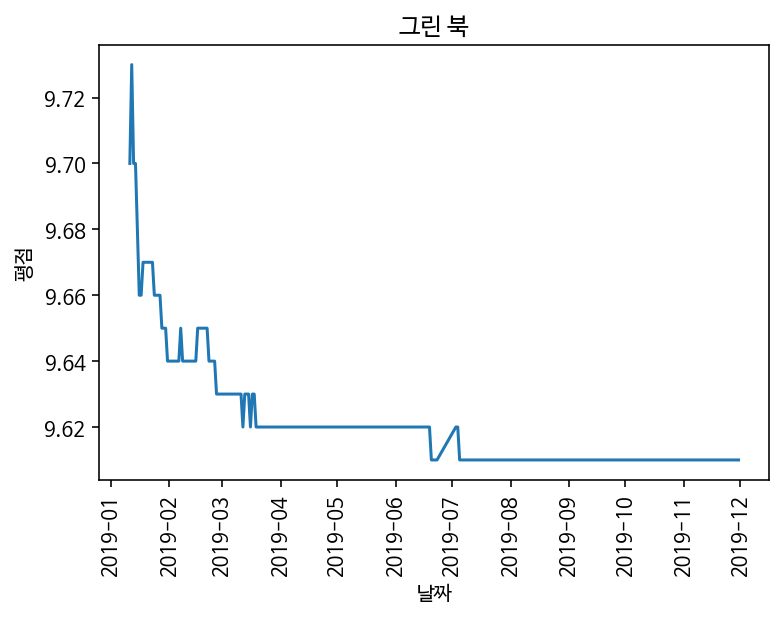

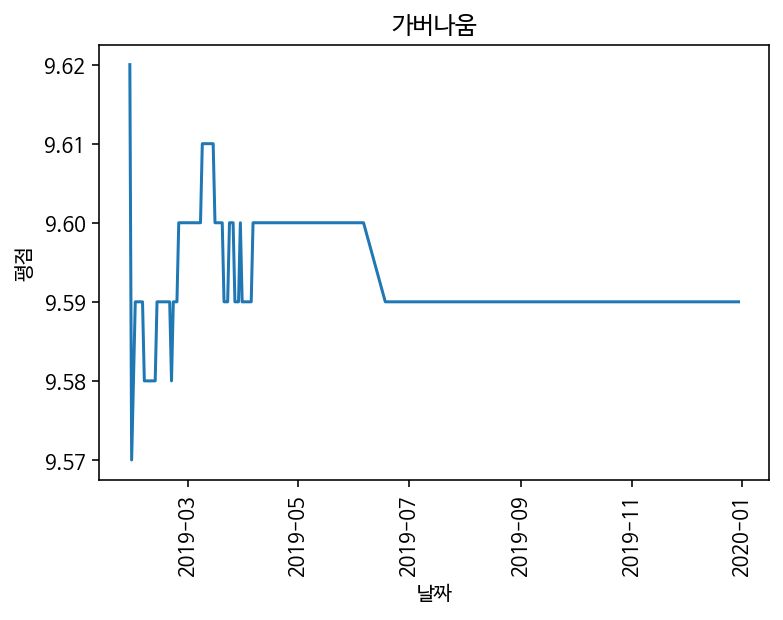

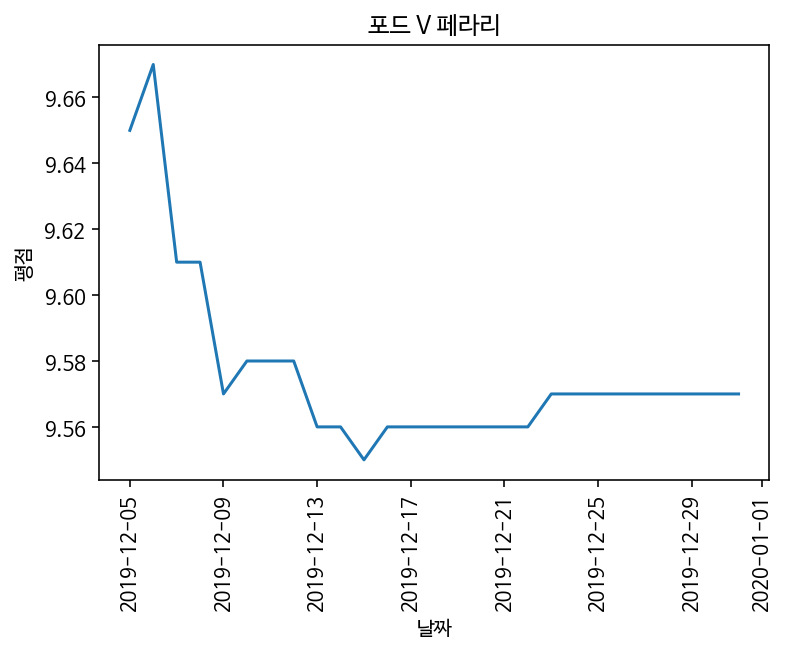

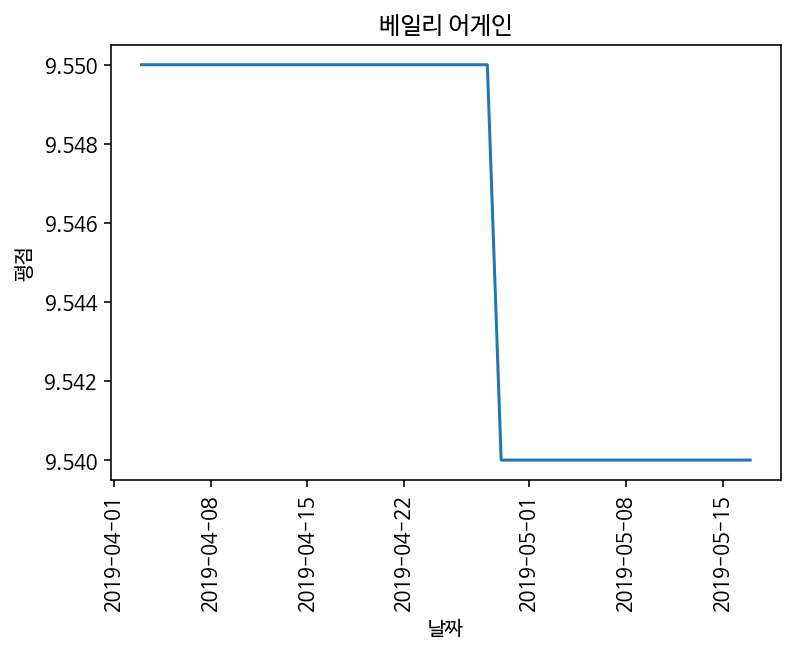

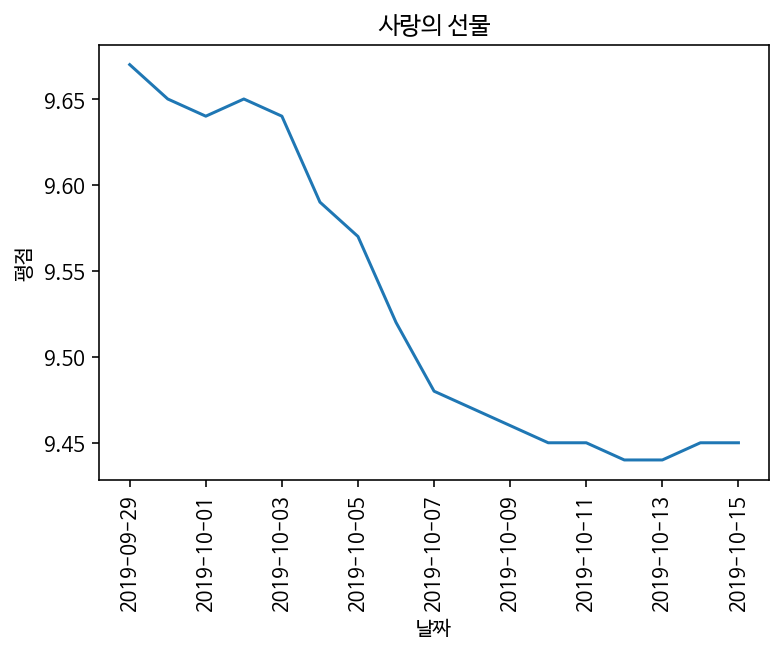

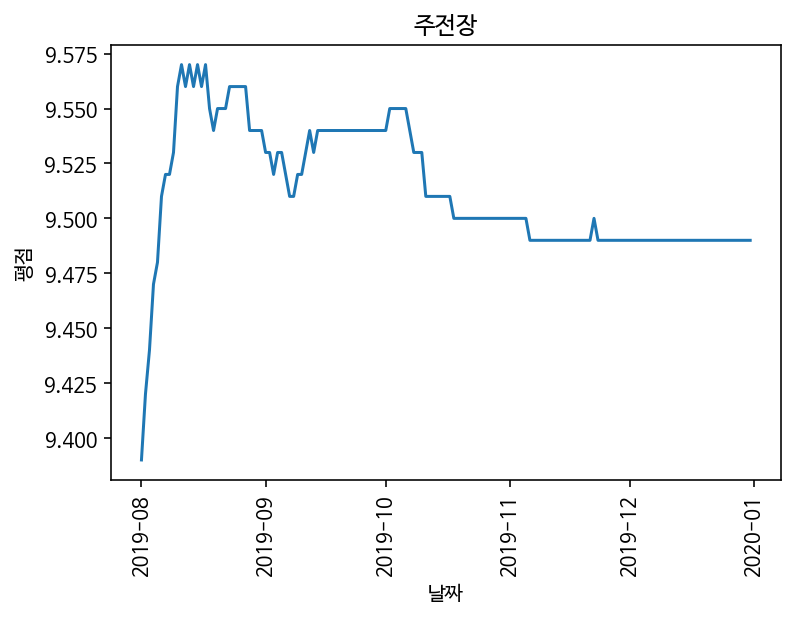

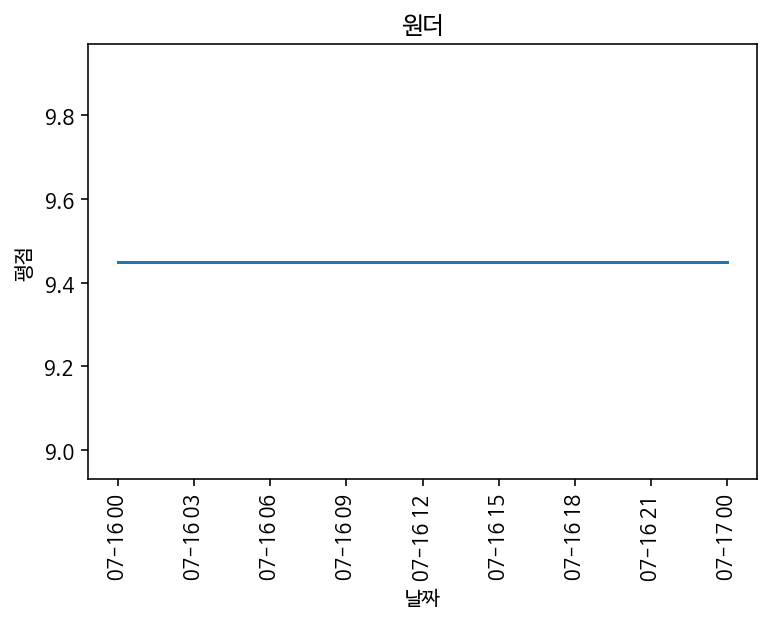

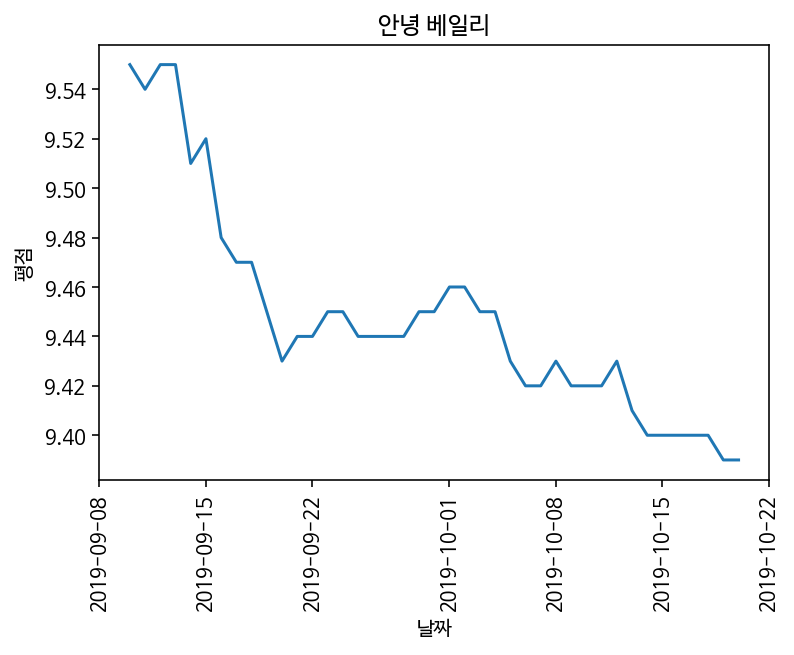

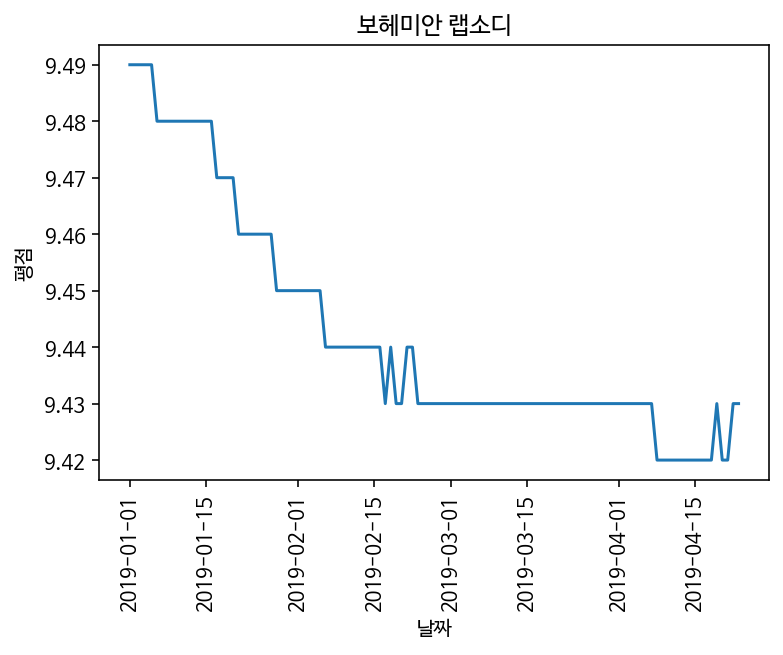

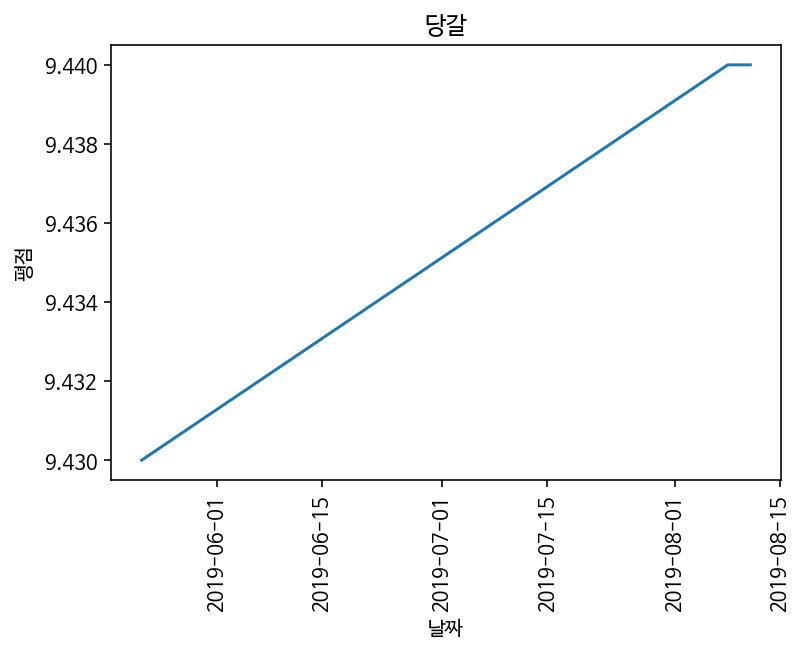

In [100]:
# 영화별로 그래프 그리기
for name in title_ranking_10:
  plt.figure()
  plt.title(name)
  plt.xticks(rotation=90)
  df_tmp = df_2019[df_2019['영화명'] == name ]
  sns.lineplot('날짜', '평점', data=df_tmp)